# COMP0189: Applied Artificial Intelligence
## Week 4 (Linear models, Trees and Ensemble Models)

## 🎯 Learning goals
1. Apply various regularized linear models to tabular data and optimize their regularization hyperparameter properly
2. Learn how to visualize the coefficients of linear models
3. Apply various tree based and ensemble models to tabular data
4. Learn how to visualize feature importance for tree based models
5. Learn how to plot data on a map

### Dataset
We will use the [Womxn in Big Data South Africa: Female-Headed Households in South Africa](https://zindi.africa/competitions/womxn-in-big-data-south-africa-female-headed-households-in-south-africa) challenge from the Zindi platform.

The challenge associated with this dataset consists of developing a Machine Learning model that using the dataset features can predict the percentage of female-headed households in a ward that have an annual income lower than approximately 2.3 thousand dollars at the time the data was collected.

The dataset has been developed using the data from the 2011 census in South Africa by aggregating key indicators that may be relevant in the context of the proposed task and that intuitively should have some connections - e.g. home type, school attendance, access to piped water, language, etc.

South Africa comprises over 4 thousand wards (i.e. geopolitical subdivisions of the country), and each feature in the dataset represents information about a specific ward, such as the prevalence of different types of dwellings or the prevalence of different population groups.

### Acknowledgements
- https://scikit-learn.org/stable/
- https://zindi.africa/competitions/womxn-in-big-data-south-africa-female-headed-households-in-south-africa 
- We thank Irina Gravila from the 2024 MSc in AI for Sustainable Development cohort for providing information about the dataset and the session/code for vizualizing the data on a map

## Setup
We first install some Python packages to help with our analysis.

In [41]:
%pip install scikit-learn==1.7.2 matplotlib==3.10.8 pandas==2.3.3 seaborn==0.13.2 folium==0.20.0
%pip install git+https://github.com/adelplanque/geojson@fix-py314 # Use fork supporting Python 3.14

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/adelplanque/geojson (to revision fix-py314) to /tmp/pip-req-build-xy0hu_mi
  Running command git clone --filter=blob:none --quiet https://github.com/adelplanque/geojson /tmp/pip-req-build-xy0hu_mi
  Running command git checkout -b fix-py314 --track origin/fix-py314
  Switched to a new branch 'fix-py314'
  branch 'fix-py314' set up to track 'origin/fix-py314'.
  Resolved https://github.com/adelplanque/geojson to commit 2584c0de5651bd694499449f9da5321b15597270
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


## Load data

We can now load the data. We know from the dataset description and the CSV file that most features are percentages; these can be safely loaded as floating-point numbers. Some features, however, are textual information: these should be loaded using pandas' String dtype, which ensures they will be treated as text rather than numbers.

In [42]:
from typing import Any
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split
import numpy.typing as npt
import random

RANDOM_STATE = 0
random.seed(RANDOM_STATE)

# We assign each feature a human-readable name for convenience
HUMAN_READABLE_FEATURES = [
    "ward",
    "total_households",
    "total_individuals",
    "target",
    "dwelling_brick_concrete",
    "dwelling_traditional",
    "dwelling_flat",
    "dwelling_cluster_complex",
    "dwelling_semidetached_complex",
    "dwelling_semidetached",
    "dwelling_house_backyard",
    "dwelling_shack_backyard",
    "dwelling_shack_not_backyard",
    "dwelling_room",
    "dwelling_tent_caravan",
    "dwelling_other",
    "dwelling_unspecified",
    "dwelling_na",
    "school_yes",
    "school_no",
    "school_unknown",
    "school_unspecified",
    "school_na",
    "satellite_tv_yes",
    "satellite_tv_no",
    "car_yes",
    "car_no",
    "landline_yes",
    "landline_no",
    "language_afrikaans",
    "language_english",
    "language_isindebele",
    "language_isixhosa",
    "language_isizulu",
    "language_sepedi",
    "language_sesotho",
    "language_setswana",
    "language_sign",
    "language_siswati",
    "language_tshivenda",
    "language_xitsonga",
    "language_other",
    "language_unspecified",
    "language_na",
    "ethnicity_black_african",
    "ethnicity_coloured",
    "ethnicity_asian",
    "ethnicity_white",
    "ethnicity_other",
    "electricity_yes",
    "piped_water_in_dwelling",
    "piped_water_in_yard",
    "piped_water_community_0_200_meters",
    "piped_water_community_200_500_meters",
    "piped_water_community_500_1000_meters",
    "piped_water_community_no",
    "piped_water_community_unspecified",
    "piped_water_community_na",
    "piped_water_community_>1000_meters",
    "ADM4_PCODE",
    "latitude",
    "longitude",
    "nightlights"
]

def load_dataset(path: str) -> pd.DataFrame:
    dtypes: dict[str, Any] = defaultdict(pd.Float32Dtype)
    dtypes["ADM4_PCODE"] = pd.StringDtype
    dtypes["ward"] = pd.StringDtype

    return pd.read_csv(path, dtype=dtypes, names=HUMAN_READABLE_FEATURES, header=0)

def split_data(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, npt.NDArray[np.float32], npt.NDArray[np.float32]]:
    X = df.drop(columns=["target"])
    y = df["target"].to_numpy(dtype=np.float32)

    return train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE) # type: ignore

df_all = load_dataset("Female_headed_household_data/data.csv")
X_train, X_test, y_train, y_test = split_data(df_all)

X_train

/tmp/ipykernel_8999/1438984507.py:85: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  return pd.read_csv(path, dtype=dtypes, names=HUMAN_READABLE_FEATURES, header=0)
/tmp/ipykernel_8999/1438984507.py:85: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  return pd.read_csv(path, dtype=dtypes, names=HUMAN_READABLE_FEATURES, header=0)
/tmp/ipykernel_8999/1438984507.py:85: UserWarning: Instantiating StringDtype without any arguments.Pass a StringDtype instance to silence this warning.
  return pd.read_csv(path, dtype=dtypes, names=HUMAN_READABLE_FEATURES, header=0)


,ward,total_households,total_individuals,dwelling_brick_concrete,dwelling_traditional,dwelling_flat,dwelling_cluster_complex,dwelling_semidetached_complex,dwelling_semidetached,dwelling_house_backyard,...,piped_water_community_200_500_meters,piped_water_community_500_1000_meters,piped_water_community_no,piped_water_community_unspecified,piped_water_community_na,piped_water_community_>1000_meters,ADM4_PCODE,latitude,longitude,nightlights
2713,30708006: Ward 6,1742.771362,6378.753418,0.73773,0.012921,0.025682,0.001765,0.000883,0.001249,0.015803,...,0.049832,0.006084,0.00096,0.069611,0.0,0.0,ZA3078006,-29.110199,24.133486,0.0
2064,83007023: Ward 23,1474.634766,5431.09375,0.862664,0.002474,0.003947,0.0,0.001043,0.000768,0.006281,...,0.001555,0.000768,0.0,0.001695,0.0,0.0,ZA8307023,-26.486393,29.429476,11.20215
402,74801023: Ward 23,4730.260742,11541.318359,0.51283,0.008424,0.005561,0.020957,0.013832,0.019438,0.067139,...,0.138245,0.025837,0.015821,0.041847,0.0,0.0,ZA7481023,-26.030575,27.863291,40.502087
2130,83103014: Ward 14,1825.59082,6763.20459,0.796478,0.00062,0.062915,0.003915,0.023775,0.008311,0.06364,...,0.00062,0.000843,0.000685,0.002832,0.0,0.0,ZA8313014,-25.783812,29.420351,29.260344
2533,63805016: Ward 16,2445.993408,9267.34668,0.925568,0.000463,0.001864,0.0,0.000463,0.022566,0.021949,...,0.0,0.0,0.0,0.000678,0.0,0.0,ZA6385016,-25.600407,25.960796,0.298945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,79900092: Ward 92,12505.836914,30438.091797,0.217598,0.008081,0.71256,0.010028,0.00944,0.000943,0.027005,...,0.001135,0.000327,0.0,0.032463,0.0,0.0,ZA7990092,-25.745338,28.224813,62.706909
835,52102001: Ward 1,1591.392822,7455.078613,0.700063,0.243849,0.004139,0.007529,0.003429,0.008802,0.00866,...,0.121342,0.100566,0.005739,0.015122,0.0,0.0,ZA5212001,-30.14374,30.474493,0.440037
1653,93403035: Ward 35,4556.711914,17693.214844,0.951067,0.036054,0.002399,0.001184,0.000931,0.000309,0.001663,...,0.073192,0.021175,0.003111,0.080888,0.0,0.0,ZA9343035,-22.981934,30.390583,17.406363
2607,64003008: Ward 8,2733.228027,9369.186523,0.903032,0.000414,0.002956,0.001213,0.002128,0.0,0.030234,...,0.0,0.000381,0.0,0.000607,0.0,0.0,ZA6403008,-26.888453,26.590355,25.109823


## Exploratory data analysis

As usual, we should start by taking at look at the dataset. The authors have conveniently provided a dataset description, which we've included here in `Female_headed_household_data/variable_descriptions.csv`.

Have a look at the file: what kind of data do we have? Is it categorical or numerical? Are all features reasonable to use for making predictions?

### Visualising the data
We can now plot some graphs showing the distribution of all features in the dataset. There are quite a few, but we can group them to make the exploration a bit simpler.

#### IDs
Check the dataset columns and description: there are 2 features which are just names or administrative identifiers for each ward (i.e. each row in the dataset). Would it be useful to plot these?

A better idea is to write a small sanity check to see if these features indeed have a unique value for each row. If so, we know that there are no repeated samples in the dataset. It is also safe to drop these columns later as they convey no meaningful information for the problem.

In [43]:
id_features = ["ADM4_PCODE", "ward"]

for feature in id_features:
    is_unique_per_ward = np.all(X_train[feature].value_counts() == 1)
    if is_unique_per_ward:
        print(f"Feature {feature} is unique for each ward")

Feature ADM4_PCODE is unique for each ward
Feature ward is unique for each ward


#### Geographical features
There are 2 features with a spatial meaning in the dataset. Which ones are they?

We can visualise their distribution using histograms. As expected, we should see a range which reflects South Africa's position in the world.

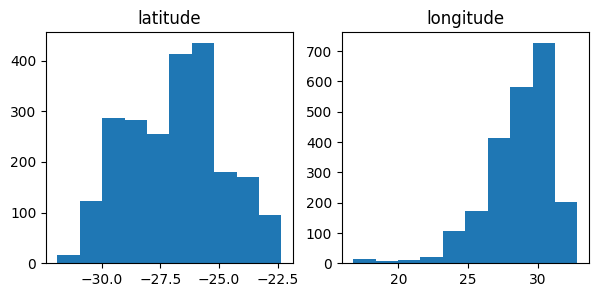

In [44]:
geographical_features = ["latitude", "longitude"]

fig, axes = plt.subplots(1, 2, figsize=(7, 3))
for i, feature in enumerate(geographical_features):
    axes[i].set_title(feature)
    axes[i].hist(X_train[feature])
plt.show()

##### Visualizing the data on a map
Visualising the data points over the map of South Africa may reveal some patterns. We can plot a point for each ward, as localised by the latitude and longitude features. Colouring the points based on their target value lets us investigate if there is a spatial relationship between data points and targets:
- Points are green if their target value is lower than the 25th percentile of the targets
- Blue if their target is between the 25th and the 50th percentile
- Orange if their target is between the 50th and the 75th percentile
- Red if their target is greater than the 75th percentile

In [45]:
import folium
import geojson

# Get centre of map
average_lat = X_train.latitude.mean()
average_lon = X_train.longitude.mean()

# Add map
mymap = folium.Map(location=[average_lat, average_lon], zoom_start=6)

# Target quantiles
target_quantiles = [np.quantile(y_train, 0.25), 
                    np.quantile(y_train, 0.50), 
                    np.quantile(y_train, 0.75)]

# Add markers for each location
locations = list(zip(X_train.latitude, X_train.longitude, y_train))
for lat, lon, target in locations:
    color = ""
    if target < target_quantiles[0]:
        color="green"
    elif target < target_quantiles[1]:
        color="blue"
    elif target < target_quantiles[2]:
        color="orange"
    else:
        color="red"

    folium.CircleMarker(location=[lat, lon], radius=0.5, color=color, opacity=.6).add_to(mymap)

# Get South Africa geometry
with open('./Female_headed_household_data/countries.geojson') as f:
    gj = geojson.load(f)

south_africa_geometry = next(x for x in gj['features'] 
                             if x['properties']['ISO_A3'] == 'ZAF')

# Add South Africa delimitation
folium.GeoJson(south_africa_geometry, style_function=lambda x: {
        "fillColor": "#ffff00",
        "color": "black",
        "weight": 1.5}).add_to(mymap)

mymap

We can observe that larger target values (red and orange dots) tend to be clustered around the eastern side of the South African shore and the far northeastern side of the country. On the other hand, the smallest target values (blue and green dots) tend to be clustered around the city of Johannesburg, with some points also present along the shore. Thus, this map indicates that the latitude and longitude can be relevant features in the dataset which, when combined, can have a correlation to the target and have the potential to help models in their predictions.

#### Percentages
The vast majority of dataset features represent percentages. There are several groups of options (e.g. dwelling type), with one column representing the prevalence of each option in each ward.

For convenience, we group them using the start of their column names.

In [46]:
PERCENTAGE_FEATURE_PREFIXES = [
    "dwelling_",
    "school_",
    "satellite_tv_",
    "car_",
    "landline_",
    "language_",
    "ethnicity_",
    "electricity_",
    "piped_water_"
]

percentage_features = []
for prefix in PERCENTAGE_FEATURE_PREFIXES:
    for column in X_train.columns:
        if column.startswith(prefix):
            percentage_features.append(column)

percentage_features

['dwelling_brick_concrete',
 'dwelling_traditional',
 'dwelling_flat',
 'dwelling_cluster_complex',
 'dwelling_semidetached_complex',
 'dwelling_semidetached',
 'dwelling_house_backyard',
 'dwelling_shack_backyard',
 'dwelling_shack_not_backyard',
 'dwelling_room',
 'dwelling_tent_caravan',
 'dwelling_other',
 'dwelling_unspecified',
 'dwelling_na',
 'school_yes',
 'school_no',
 'school_unknown',
 'school_unspecified',
 'school_na',
 'satellite_tv_yes',
 'satellite_tv_no',
 'car_yes',
 'car_no',
 'landline_yes',
 'landline_no',
 'language_afrikaans',
 'language_english',
 'language_isindebele',
 'language_isixhosa',
 'language_isizulu',
 'language_sepedi',
 'language_sesotho',
 'language_setswana',
 'language_sign',
 'language_siswati',
 'language_tshivenda',
 'language_xitsonga',
 'language_other',
 'language_unspecified',
 'language_na',
 'ethnicity_black_african',
 'ethnicity_coloured',
 'ethnicity_asian',
 'ethnicity_white',
 'ethnicity_other',
 'electricity_yes',
 'piped_water_in_

We should have a little sanity check for this data. Do all values of the percentage features lie between 0 and 1, as all good percentages should?

In [47]:
print(np.all(X_train[percentage_features].min() >= 0))
print(np.all(X_train[percentage_features].max() <= 1))

True
True


Looks like they do, so we already know the range of possible values for these features. There are also many of them, so plotting a histogram for each would not be very readable.

A better alternative is to plot a bar chart for each group of options (e.g. dwelling types). Each chart shows the possible options along with its mean percentage across wards.

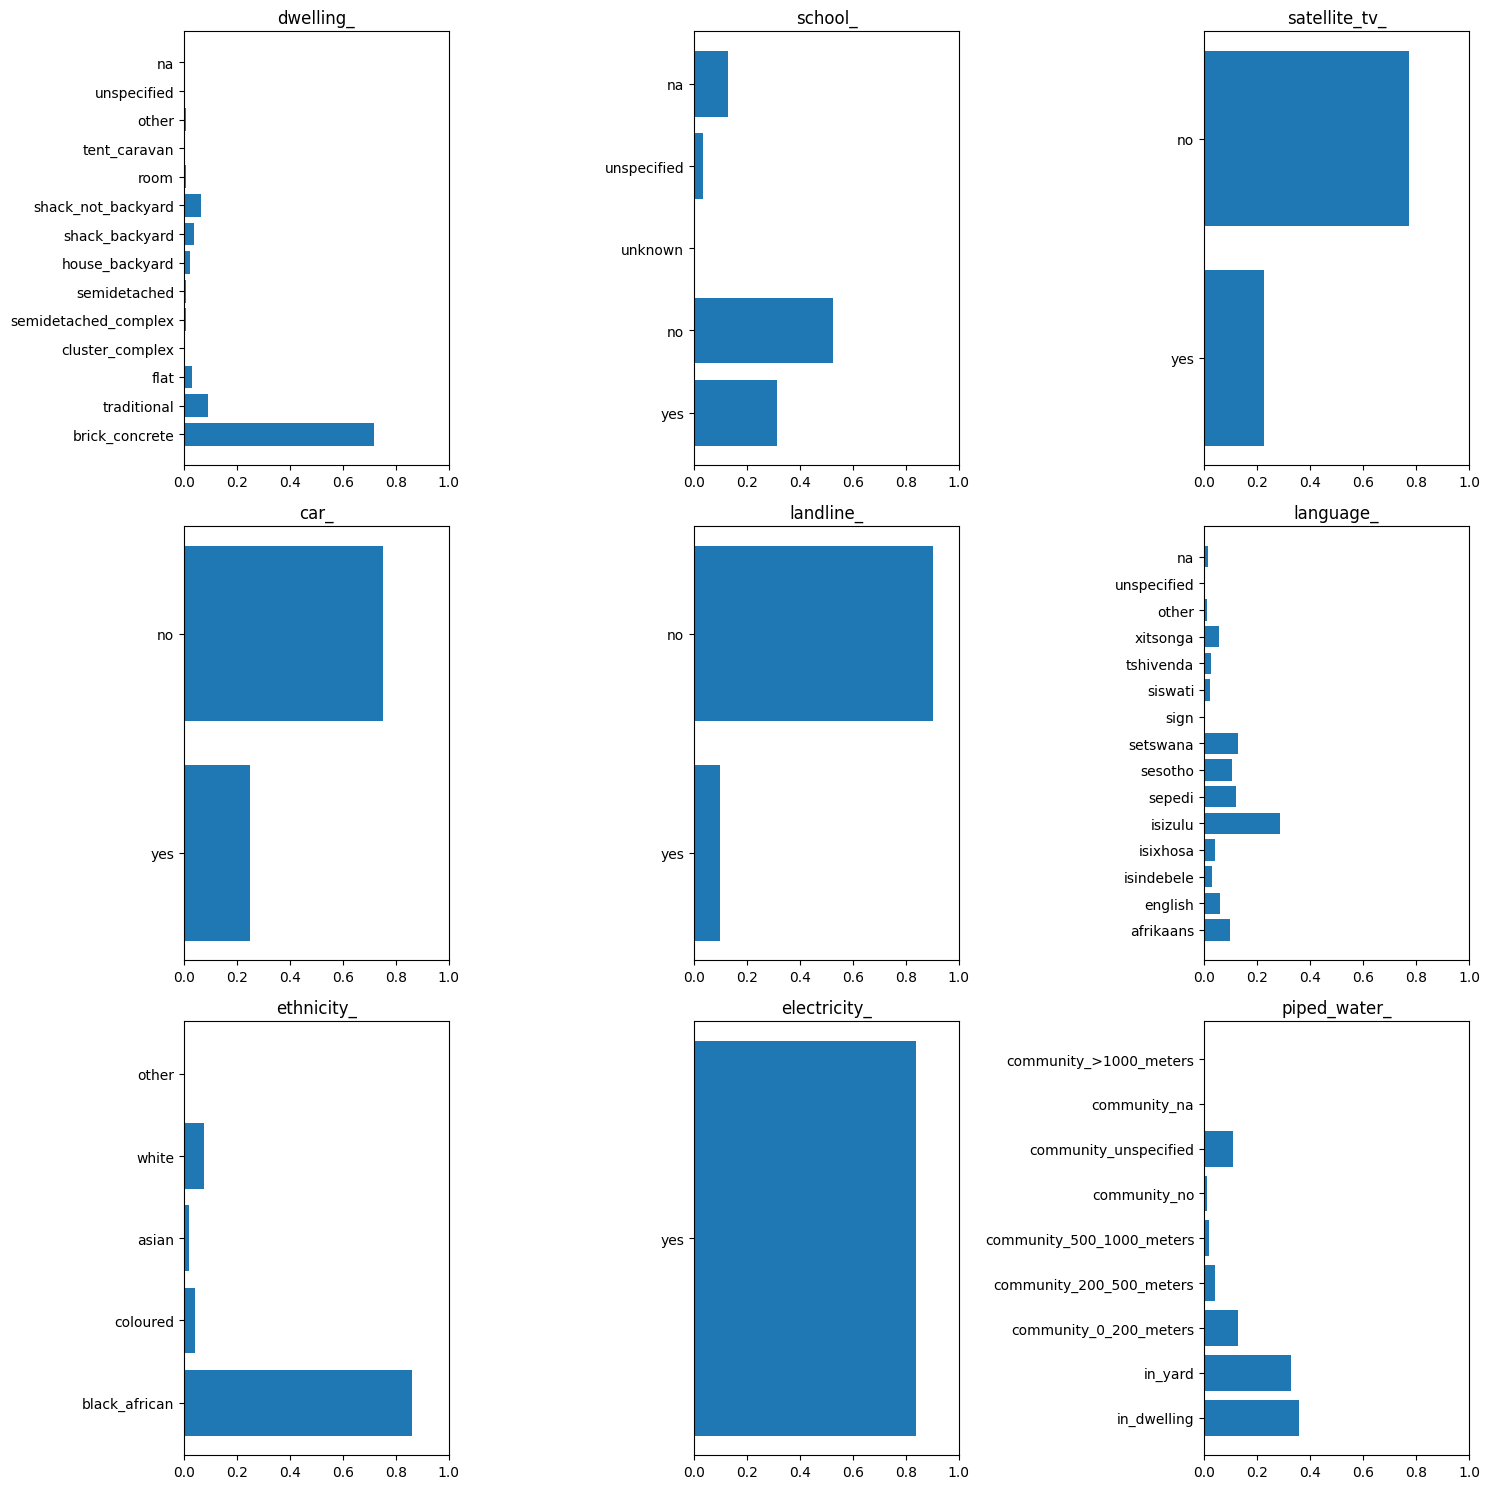

In [48]:
from matplotlib.axes import Axes

def plot_mean_percentages(data: pd.DataFrame, feature_prefix: str, axes: Axes) -> None:
    """
    Plots the mean prevalence of each option in a group of options.
    The data is plotted as a bar graph in the given axes
    """
    means = {}
    for column in [c for c in data.columns if c.startswith(feature_prefix)]:
        simplified_name = column.replace(feature_prefix, "")
        means[simplified_name] = data[column].mean()

    axes.set_title(feature_prefix)
    axes.set_xlim(0, 1)
    axes.barh(list(means.keys()), list(means.values()))


fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for i, prefix in enumerate(PERCENTAGE_FEATURE_PREFIXES):
    plot_mean_percentages(X_train, prefix, axes[i])

fig.tight_layout()
plt.show()

While interesting, this plot reveals a couple of issues.

Firstly, some options seem to be very underrepresented - some may even be always 0. For this exercise, we just want to find the percentages which are always 0 (or any other constant) so we can safely remove them from the dataset. 

In [49]:
constant_features = []

for feature in percentage_features:
    if np.all(X_train[feature].std() == 0):
        constant_features.append(feature)

constant_features

['dwelling_unspecified',
 'dwelling_na',
 'language_unspecified',
 'piped_water_community_na',
 'piped_water_community_>1000_meters']

Secondly, some features seem redundant: they are both percentages where one feature shows the proportion of "yes" and one shows the proportion of "no". Assuming that the two sum up to one, it's safe to remove one of the options without losing information.

Let's run a quick sanity check to see if the percentages of all options in a group sum up to 1.

In [50]:
def check_percentages(df: pd.DataFrame, prefix: str):
    tot = np.zeros(len(df), dtype=np.float32)
    for column in [c for c in df.columns if c.startswith(prefix)]:
        tot += df[column].to_numpy().ravel()
    return np.all(np.isclose(tot, 1))

for prefix in PERCENTAGE_FEATURE_PREFIXES:
    is_total_1 = check_percentages(X_train, prefix)
    if not is_total_1:
        print(f"Percentages starting with \"{prefix}\" do not sum up to 1")

Percentages starting with "electricity_" do not sum up to 1


The only feature which doesn't is electricity use, which is already sparsely encoded (i.e. it only has 1 option). There are 3 other groups which can be encoded in this way, as they only have one option for "yes" and one for "no". Add one of their 2 columns to the list below. 

In [51]:
redundant_features = [
    "satellite_tv_no",
    "car_no",
    "landline_no",
]

#### Unconstrained features
The last 3 features in the dataset can simply be plotted as histograms.

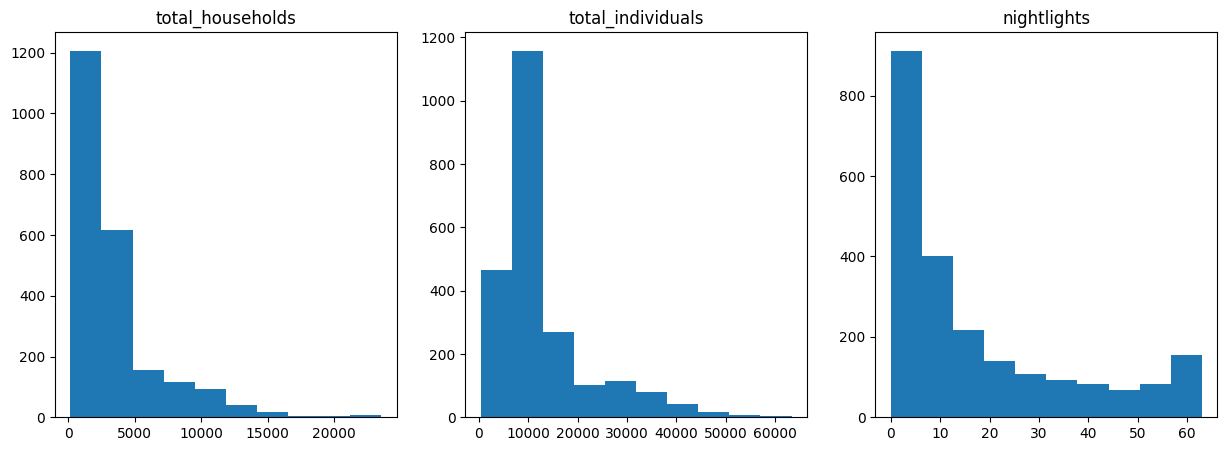

In [52]:
features = ["total_households", "total_individuals", "nightlights"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(features):
    axes[i].set_title(feature)
    axes[i].hist(X_train[feature])

plt.show()

## Preprocessing

Now that we've visualised the distributions and uncovered some issues with the data, write a preprocessing `Pipeline` to prepare the data before training.

Based on the previous exercises, there are 10 features which can be safely dropped; you can do this in a `ColumnTransformer` using the special "drop" keyword.

Based on the prevalence of numerical features, you may be tempted to apply a scaler to everything else. Is this a sensible choice?

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

useless_features = [
    *id_features,
    *redundant_features,
    *constant_features
]

preprocessor = ColumnTransformer([
    ("unbounded_num", StandardScaler(), ["total_households", "total_individuals", "latitude", "longitude", "nightlights"]),
    ("drop_useless", "drop", useless_features)
], remainder="passthrough")

preprocessor.fit_transform(X_train)

array([[-0.5942497635257187, -0.6749462202558433, -1.0910314720826748,
        ..., 0.006084435619413853, 0.0009603555081412196,
        0.06961097568273544],
       [-0.6798703813678172, -0.7762633683309718, 0.19333788492136436,
        ..., 0.000768115627579391, 0.0, 0.0016949145356193185],
       [0.3597068752535758, -0.1230008602332277, 0.416463717403082, ...,
        0.025836937129497528, 0.015821319073438644, 0.041847120970487595],
       ...,
       [0.3042897554950766, 0.5347169134758438, 1.9087925497759717, ...,
        0.021174756810069084, 0.0031106816604733467, 0.08088777214288712],
       [-0.2779799493467386, -0.3552300141151227, -0.0034727680955562133,
        ..., 0.0003813914954662323, 0.0, 0.0006065721972845495],
       [-0.5806757826256908, -0.7644890510084595, -0.5129891682207673,
        ..., 0.004081957507878542, 0.001516971504315734,
        0.014590814709663391]], shape=(2257, 52), dtype=object)

## Task 1: Linear models
In this task, we will train and evaluate some [linear models](https://scikit-learn.org/stable/modules/linear_model.html#). We will investigate the effect of different types and strength of regularisation on our models.

These are the models we're going to use:
- [Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)
- [LASSO](https://scikit-learn.org/stable/modules/linear_model.html#lasso)
- [ElasticNet](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

The main difference between them is the type of regularisation. See the lecture notes and the documentation linked above for more information.

### 1.1 Train and evaluate models
Create a pipeline to train and test the linear models with varying regularization settings, and chose the best model for predicting the target. Print the average cross-validation performance (with the standard deviation) as well as the test performance.

For Ridge regression and LASSO, only change the strength of the regularisation. Check the scikit docs: which hyperparameter controls this?

> To cover a lot of possible values quickly, the hyperparameter ranges should be picked on a log scale

For ElasticNet, also change the relative weight of the L2 and L1 norms. In this case, try only 2-4 values: the plotting task later will be hard to read otherwise.

In [63]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def make_full_pipeline(model: BaseEstimator) -> Pipeline:
    return Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

def optimise_hyperparameters(model: Pipeline, hyperparams: dict, X_train: pd.DataFrame, y_train: npt.NDArray[np.float32]):
    tuner = GridSearchCV(model,
                         cv=5,
                         param_grid=hyperparams,
                         n_jobs=-1,
                         refit=True,
                         scoring="neg_root_mean_squared_error")
    return tuner.fit(X_train, y_train)

# Define the parameter grids for each model
alpha_range = np.logspace(-4, -2, 100)

ridge_params = {
    'regressor__alpha': alpha_range
}
lasso_params = {
    'regressor__alpha': alpha_range
}
elastic_params = {
    'regressor__alpha': alpha_range,
    'regressor__l1_ratio': [0.01, 0.2, 0.5, 0.8]
}

# Join up preprocessing and model pipelines
ridge_pipeline = make_full_pipeline(Ridge(random_state=RANDOM_STATE, max_iter=10000))
lasso_pipeline = make_full_pipeline(Lasso(random_state=RANDOM_STATE, max_iter=10000))
elasticnet_pipeline = make_full_pipeline(ElasticNet(random_state=RANDOM_STATE, max_iter=10000))

# Optimise the hyperparameters
tuned_ridge = optimise_hyperparameters(ridge_pipeline, ridge_params, X_train, y_train)
tuned_lasso = optimise_hyperparameters(lasso_pipeline, lasso_params, X_train, y_train)
tuned_elastic = optimise_hyperparameters(elasticnet_pipeline, elastic_params, X_train, y_train)

Then, let's evaluate the trained models.

In [64]:
from sklearn.metrics import root_mean_squared_error

def evaluate_performance(model_name: str, tuner: GridSearchCV, results_df: pd.DataFrame):
    cv_test_scores = tuner.cv_results_["mean_test_score"]
    cv_score_mean = cv_test_scores.mean()
    cv_score_std = cv_test_scores.std()

    y_pred = tuner.predict(X_test)
    test_score = root_mean_squared_error(y_pred, y_test)

    results_df.loc[len(results_df)] = [model_name, tuner.best_params_, -cv_score_mean, cv_score_std, test_score]

results_df = pd.DataFrame(columns=['Model', 'Best Hyperparameters', 'Mean CV Score (RMSE)', "CV score std", 'Test RMSE'])
evaluate_performance("Ridge", tuned_ridge, results_df)
evaluate_performance("LASSO", tuned_lasso, results_df)
evaluate_performance("ElasticNet", tuned_elastic, results_df)

results_df

,Model,Best Hyperparameters,Mean CV Score (RMSE),CV score std,Test RMSE
0,Ridge,{'regressor__alpha': 0.01},3.885387,0.001936,3.800946
1,LASSO,{'regressor__alpha': 0.00048626015800653534},3.891979,0.023612,3.806847
2,ElasticNet,"{'regressor__alpha': 0.00019179102616724886, '...",4.006653,0.163672,3.812565


### 1.2 Plot CV performance as function of hyperparameters
Create a plot to show the effect of the regularisation strength on each model's performance. For each model, plot how the CV performance varies as alpha increases.

Note that you'll have to plot ElasticNet performance separately for each value of L1 ratio.

> Hint: if you're using a log scale, `plt.semilogx` is a good function to use here

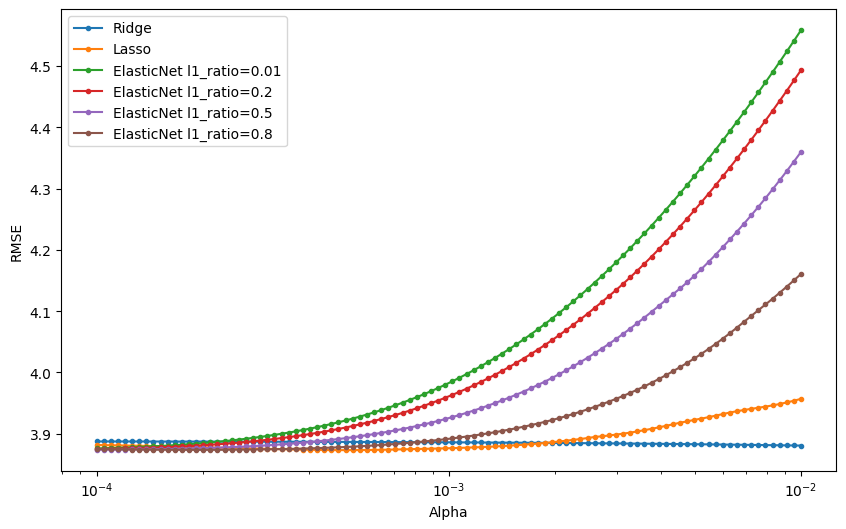

In [65]:
def plot_model_performance(grid_search: GridSearchCV, model_name: str, axes: Axes) -> None:
    """ 
    Plot the error observed in the given grid search
    for each value of the regularisation strength hyperparameter.
    """
    axes.set_ylabel("RMSE")
    axes.set_xlabel("Alpha")

    results = pd.DataFrame(grid_search.cv_results_)
    alphas = results['param_regressor__alpha']
    scores = -results['mean_test_score']  # Negate to get RMSE
    if model_name != 'ElasticNet':
        # For Ridge and Lasso
        axes.semilogx(alphas, scores, label=model_name, marker=".", linestyle='-')
    else:
        # For ElasticNet, need to handle combinations of alpha and l1_ratio
        l1_ratios = results['param_regressor__l1_ratio']

        # Unique l1_ratios for plotting
        unique_l1_ratios = np.unique(l1_ratios)
        for l1_ratio in unique_l1_ratios:
            # Filter scores for each l1_ratio
            indices = l1_ratios == l1_ratio
            axes.semilogx(alphas[indices], scores[indices], label=f'ElasticNet l1_ratio={l1_ratio}', marker=".", linestyle='-')
    
    axes.legend()

# Create a single figure and axis
fig, axes = plt.subplots(figsize=(10, 6))

# Plot the performance of each model on the same axis
plot_model_performance(tuned_ridge, 'Ridge', axes)
plot_model_performance(tuned_lasso, 'Lasso', axes)
plot_model_performance(tuned_elastic, 'ElasticNet', axes)

# Show the plot
plt.show()

Try generating this plot using different hyperparameter ranges for the cross-validation. What does it look like if you try a very broad range? What if you focus on very small values?

Do you see a significant difference between the 3 models?

### 1.3 Plot model coefficients
Create figures to show the models coefficients for model interpretation (i.e. including the feature names). For each model, you should show the 10 features with the largest coefficients.

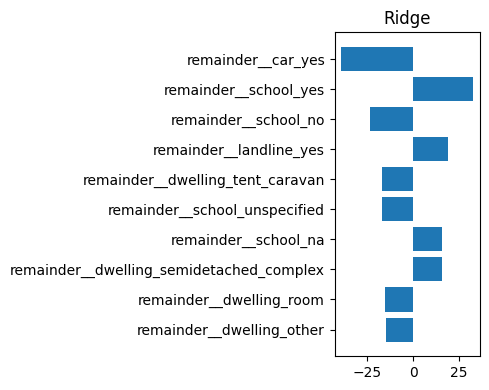

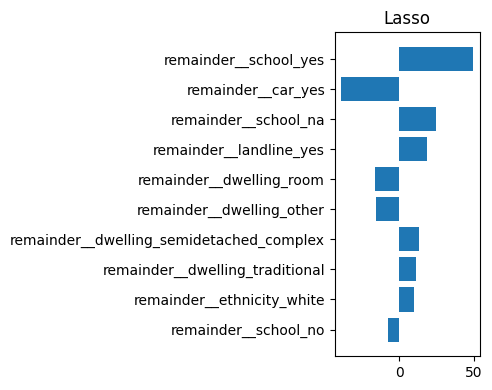

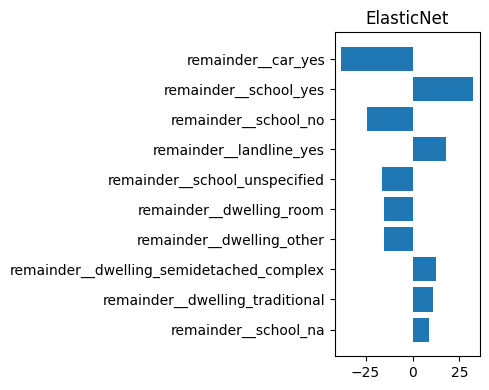

In [67]:
def plot_top_model_coefficients(tuner: GridSearchCV, model_name: str) -> None:
    # Extract coefficients
    scores = tuner.best_estimator_[-1].coef_
    names = tuner.best_estimator_[-2].get_feature_names_out()

    # Sort the coefficients and corresponding feature names
    importances = list(zip(names, scores))
    sorted_importances = sorted(importances, key=lambda x: abs(x[1]))
    top_features = sorted_importances[-10:]

    # Plot
    fig, ax = plt.subplots(figsize=(5,4))
    ax.barh([x[0] for x in top_features], [x[1] for x in top_features])
    ax.set_title(model_name)
    fig.tight_layout()
    plt.show()

plot_top_model_coefficients(tuned_ridge, "Ridge")
plot_top_model_coefficients(tuned_lasso, "Lasso")
plot_top_model_coefficients(tuned_elastic, "ElasticNet")

### 1.4 Check weight distribution
Now plot a histogram showing the distribution of weight magnitudes for the 3 models. What do you observe?

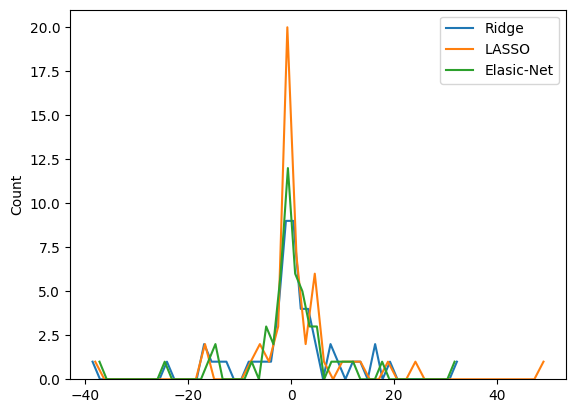

In [68]:
import seaborn as sns

sns.histplot(tuned_ridge.best_estimator_[-1].coef_, element="poly", fill=False, bins=50)
sns.histplot(tuned_lasso.best_estimator_[-1].coef_, element="poly", fill=False, bins=50)
sns.histplot(tuned_elastic.best_estimator_[-1].coef_, element="poly", fill=False, bins=50)
plt.legend(["Ridge", "LASSO", "Elasic-Net"])
plt.show()

### 1.5 Check model similarity
Finally, create a similarity matrix to show the similarity of the coefficients across the different models. Which ones are more similar?

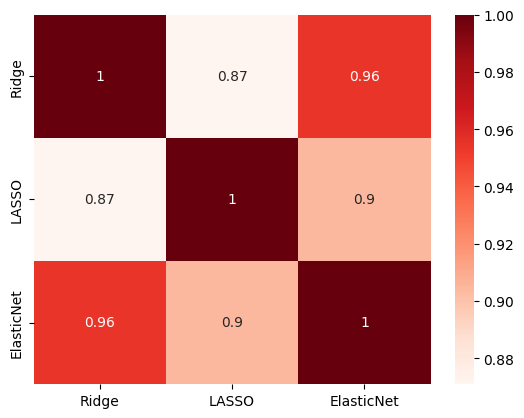

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

# Extract coefficients
rows = tuned_ridge.best_estimator_[-1].coef_
l = tuned_lasso.best_estimator_[-1].coef_
e = tuned_elastic.best_estimator_[-1].coef_

# Form a matrix of coefficients
combi = np.vstack((rows, l, e))

# Calculate similarity matrix
similarities = cosine_similarity(combi, combi)

# Plotting the similarity matrix
model_names = ["Ridge", "LASSO", "ElasticNet"]
sns.heatmap(similarities, annot=True, cmap="Reds", xticklabels=model_names, yticklabels=model_names)
plt.show()

### Discussion: How does the performance compare across models? Are the coefficients similar across models?

## Task 2: Tree and ensemble models

### 2.1 Train models
For the same dataset compare the performance of a decision tree and ensemble methods (e.g. bagging, boosting and gradient boosting).

Trees: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree  
Ensembles: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [70]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize models with a pipeline
decision_tree = DecisionTreeRegressor(random_state=RANDOM_STATE)
bagging = BaggingRegressor(random_state=RANDOM_STATE)
boosting = AdaBoostRegressor(random_state=RANDOM_STATE)
gradient_boosting = GradientBoostingRegressor(random_state=RANDOM_STATE)

models = {
    "Decision Tree": decision_tree,
    "Bagging": bagging,
    "Boosting": boosting,
    "Gradient Boosting": gradient_boosting
}

# Define parameter grids
decision_tree_params = {'regressor__max_depth': [3, 20]}
bagging_params = {'regressor__n_estimators': [5,  50, 100]}
boosting_params = {'regressor__n_estimators': [5, 50, 100]}
gradient_boosting_params = {'regressor__n_estimators': [5, 50, 100]}

# Create a dictionary to hold the parameter grids
param_grids = {
    "Decision Tree": decision_tree_params,
    "Bagging": bagging_params,
    "Boosting": boosting_params,
    "Gradient Boosting": gradient_boosting_params
}

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Best Hyperparameters', 'Mean CV Score (RMSE)', "CV score std", 'Test RMSE'])

# Perform GridSearchCV for each model and store results
fitted_models = {}
for name, model in models.items():
    print(f"Fitting {name}")
    tuner = optimise_hyperparameters(make_full_pipeline(model), param_grids[name], X_train, y_train)
    evaluate_performance(name, tuner, results_df)
    fitted_models[name] = tuner

# Display the results
results_df

Fitting Decision Tree
Fitting Bagging
Fitting Boosting
Fitting Gradient Boosting


,Model,Best Hyperparameters,Mean CV Score (RMSE),CV score std,Test RMSE
0,Decision Tree,{'regressor__max_depth': 3},5.136985,0.092774,4.984641
1,Bagging,{'regressor__n_estimators': 100},3.737403,0.178925,3.395438
2,Boosting,{'regressor__n_estimators': 100},4.240979,0.204782,4.112800
3,Gradient Boosting,{'regressor__n_estimators': 100},4.851849,1.663941,3.573665


### 2.2 Plot feature importances
Create figures to show the top 10 features accordingly to feature importance for the different models

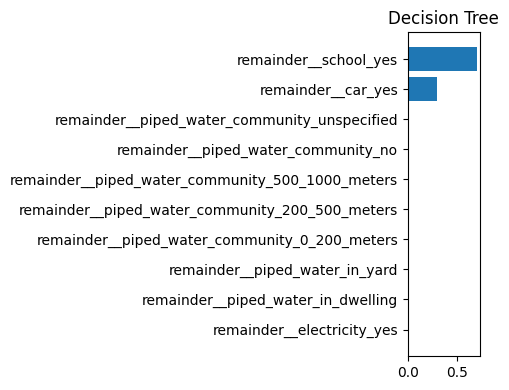

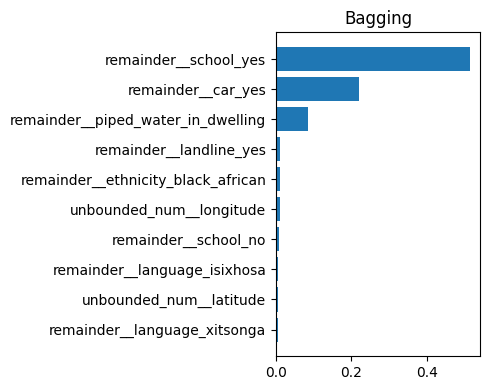

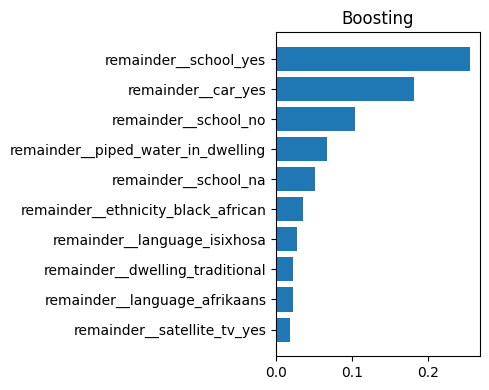

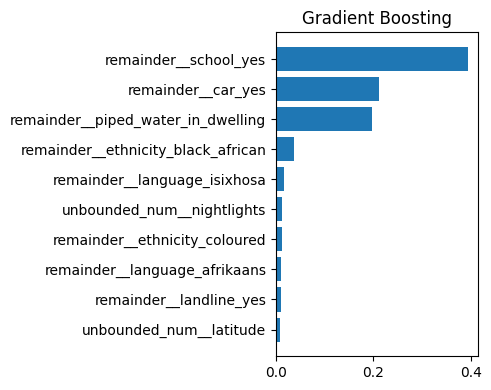

In [71]:
def plot_feature_importances(model: GridSearchCV, name: str, ax: Axes):
    # Extract the regressor from the pipeline
    regressor = model.best_estimator_[-1]
    feature_names = model.best_estimator_[-2].get_feature_names_out()

    # Handle BaggingRegressor and get feature importances
    if isinstance(regressor, BaggingRegressor):
        scores = np.mean([tree.feature_importances_ for tree in regressor.estimators_], axis=0)
    else:
        scores = regressor.feature_importances_

    # Sort the coefficients and corresponding feature names
    importances = list(zip(feature_names, scores))
    sorted_importances = sorted(importances, key=lambda x: abs(x[1]))
    top_features = sorted_importances[-10:]

    # Plot
    fig, ax = plt.subplots(figsize=(5,4))
    ax.barh([x[0] for x in top_features], [x[1] for x in top_features])
    ax.set_title(name)
    fig.tight_layout()
    plt.show()

# Plotting feature importances for each model
for name, model in fitted_models.items():
    plot_feature_importances(model, name, axes)

**Discussion**  
**Were the features selected similar across the different models?**

### 2.3 Pruning trees
Compare two different approaches for prunning a decision tree (cost-complexity prunning and max leaves nodes) and plot the resulting trees.

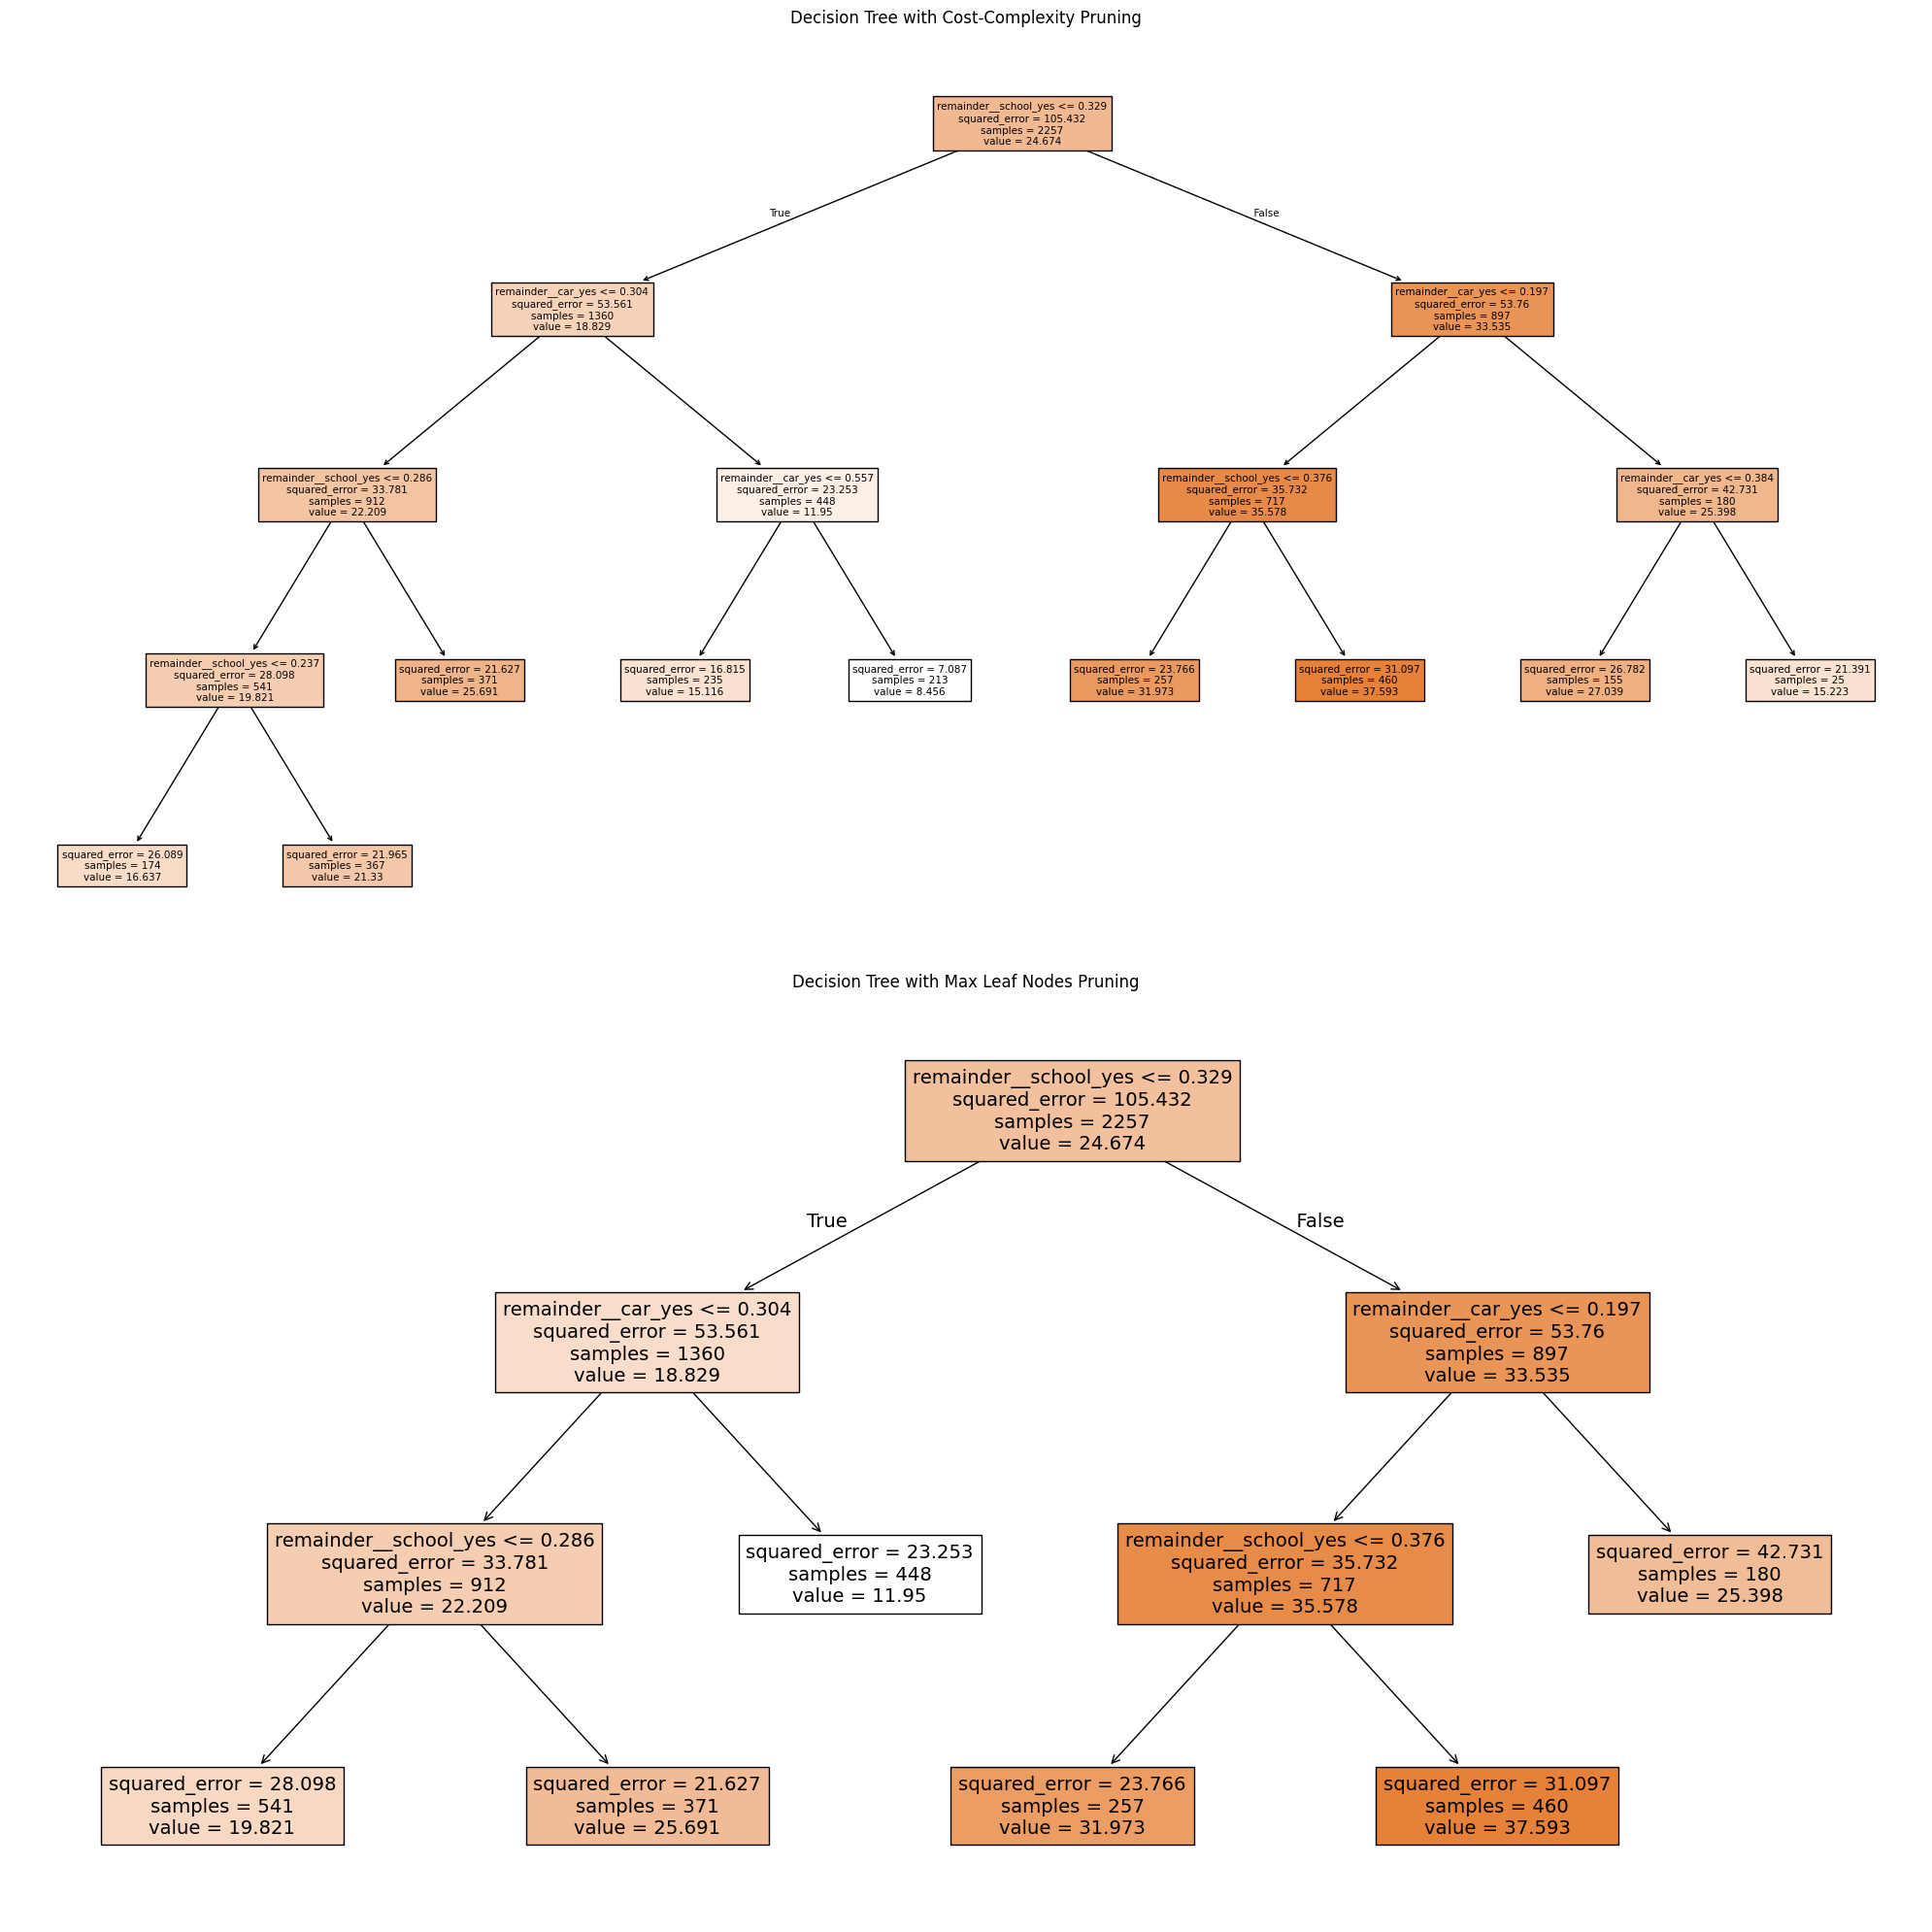

In [77]:
from sklearn.tree import plot_tree

# Initialize decision tree model with a pipeline
decision_tree_ccp = make_full_pipeline(
    DecisionTreeRegressor(
        ccp_alpha=0.9,
        random_state=RANDOM_STATE
    ),
)
decision_tree_max_leaf = make_full_pipeline(
    DecisionTreeRegressor(
        max_leaf_nodes=6,
        random_state=RANDOM_STATE
    )
)

decision_tree_ccp.fit(X_train, y_train)
decision_tree_max_leaf.fit(X_train, y_train)

# Plot the trees
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))

plot_tree(decision_tree_ccp.named_steps['regressor'],
          feature_names=decision_tree_ccp.named_steps['preprocessor'].get_feature_names_out(),
          filled=True,
          ax=axes[0])
axes[0].set_title('Decision Tree with Cost-Complexity Pruning')

plot_tree(decision_tree_max_leaf.named_steps['regressor'],
          feature_names=decision_tree_ccp.named_steps['preprocessor'].get_feature_names_out(),
          filled=True,
          ax=axes[1])
axes[1].set_title('Decision Tree with Max Leaf Nodes Pruning')

fig.tight_layout()
plt.show()